In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# expanding the dislpay of tweet text for columns and rows
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)

In [2]:
# Read pre-processed data.
sunway_df_processed = pd.read_csv('sunway_df_processed.csv')
taylor_df_processed = pd.read_csv('taylor_df_processed.csv')
ucsi_df_processed = pd.read_csv('ucsi_df_processed.csv')
um_df_processed = pd.read_csv('um_df_processed.csv')
upm_df_processed = pd.read_csv('upm_df_processed.csv')
ukm_df_processed = pd.read_csv('ukm_df_processed.csv')

In [3]:
sunway_df_processed.head(20)

User               Date_Created  Number_of_Likes  \
0           jkmkhoo  2022-09-29 13:30:47+00:00                2   
1          eurospan  2022-09-29 09:46:32+00:00                0   
2         SunwayCPH  2022-09-29 08:30:05+00:00                4   
3    keenguyencaphe  2022-09-29 04:13:02+00:00                5   
4          Mia7Jane  2022-09-28 11:16:17+00:00                1   
5         SunwayCPH  2022-09-27 06:52:59+00:00                3   
6         SunwayCPH  2022-09-27 06:17:26+00:00                4   
7         SunwayCPH  2022-09-27 06:17:23+00:00                4   
8         SunwayCPH  2022-09-27 06:17:20+00:00                5   
9          Mia7Jane  2022-09-26 23:38:57+00:00                3   
10     great_peters  2022-09-26 14:22:13+00:00                0   
11     michellengms  2022-09-26 12:27:00+00:00               30   
12  sunwayechomedia  2022-09-26 10:30:09+00:00                0   
13       thekopidao  2022-09-26 02:51:36+00:00               19   
14    MIASAMalaysia  2022-09-26 02:01:18+00:00                0   
15       iamflorahh  2022-09-25 16:04:57+00:00                3   
16  theedgemalaysia  2022-09-25 12:35:04+00:00                2   
17       staronline  2022-09-25 00:33:00+00:00                0   
18       CJMalaysia  2022-09-25 00:30:00+00:00                0   
19     MengKeetYong  2022-09-24 14:49:30+00:00                0   

              Source_of_Tweet  \
0             Twitter Web App   
1             Twitter Web App   
2          Twitter for iPhone   
3         Twitter for Android   
4         Twitter for Android   
5          Twitter for iPhone   
6          Twitter for iPhone   
7          Twitter for iPhone   
8          Twitter for iPhone   
9         Twitter for Android   
10          Revive Social App   
11         Twitter for iPhone   
12              WordPress.com   
13            Twitter Web App   
14            Twitter Web App   
15            Twitter Web App   
16  ProdTheEdgeMarketsFeedAPI   
17        TwitterRSSTSOLAgent   
18            Twitter Web App   
19         Twitter for iPhone   

                                                                                                                                                                                                                                                           Tweet  \
0                                                                                                                                                                         this restaurant at near sunday university might suit a british palate well winkingface   
1                                                                              exciting news sunday university press have launched a branded short story competition inspired by the un sustainable development goals you can find out more on european blow now   
2                                                                                        check this outour chief plantar health scientist dris in the latest episode of katipunan dialogue podcast speakingheadplanetaryhealth sunwaycph sunwayuniversity upside   
3               thus that was an amazing weekend as see nguyễn went on the loose to bring vietnams finest coffee into sunday university big buds keenguyensunway for all hardware and we hope one sip brings you vienna or back already winkingfacegot events do   
4                                                                                                                                                             he asked dr jane from sunday university but not malaysia grinningsquintingface mosthappeningcampus   
5                                                                                                  truly one of the greatestMalaysiagreenheart thank your this special feature on our executive directorplanetaryhealth sunwaycph sunwayuniversity climatecrisis   
6                                                                                            

# Column 'Sentiment'

## Tables

In [24]:
# Function for count_values in single column.
def count_values_in_column(df,columns):
    count = df.loc[:,columns].value_counts(dropna=False)
    percentage = round(df.loc[:,columns].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])

In [5]:
# Count and percentage of sentiments for Sunway University.
count_values_in_column(sunway_df_processed,'Sentiment')

Count  Percentage
positive    267       56.81
neutral     163       34.68
negative     40        8.51

In [6]:
# Count and percentage of sentiments for Taylor's University.
count_values_in_column(taylor_df_processed,'Sentiment')

Count  Percentage
positive    374       58.62
neutral     190       29.78
negative     74       11.60

In [7]:
# Count and percentage of sentiments for UCSI University.
count_values_in_column(ucsi_df_processed,'Sentiment')

Count  Percentage
positive    523       76.46
neutral     110       16.08
negative     51        7.46

In [8]:
# Count and percentage of sentiments for UM.
count_values_in_column(um_df_processed,'Sentiment')

Count  Percentage
positive    657       53.99
neutral     377       30.98
negative    183       15.04

In [9]:
# Count and percentage of sentiments for UPM.
count_values_in_column(upm_df_processed,'Sentiment')

Count  Percentage
positive    318       59.77
neutral     139       26.13
negative     75       14.10

In [10]:
# Count and percentage of sentiments for UKM.
count_values_in_column(ukm_df_processed,'Sentiment')

Count  Percentage
positive    317       51.46
neutral     224       36.36
negative     75       12.18

## Piechart

In [11]:
# Function to create piechart for Sentiment.
def pie_chart_s(df):
    # create data for Pie Chart.
    piechart = count_values_in_column(df,'Sentiment')
    names = piechart.index
    size = piechart['Percentage']
    positive = piechart.loc['positive', 'Percentage']
    neutral = piechart.loc['neutral', 'Percentage']
    negative = piechart.loc['negative', 'Percentage']
    
    labels = ['Positive ['+ str(positive) + '%]' , 'Neutral [' + str(neutral) 
              +'%]','Negative [' + str(negative) + '%]']
    
    # Create a circle for the center of the plot.
    my_circle=plt.Circle((0,0), 0.7, color='white')
    plt.pie(size, labels=names, colors=['#66ff33','#00ffff','#ff3300'])
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.legend(labels,bbox_to_anchor=(1, 1))
    plt.show()

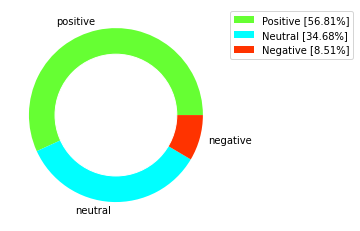

In [12]:
# Pie chart of sentiments for Sunway University.
pie_chart_s(sunway_df_processed)

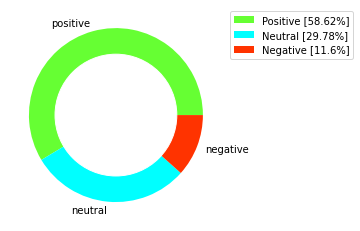

In [13]:
# Pie chart of sentiments for Taylor's University.
pie_chart_s(taylor_df_processed)

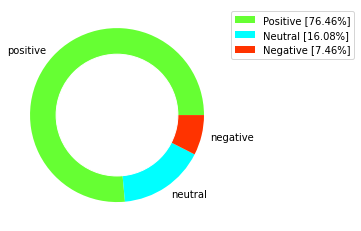

In [14]:
# Pie chart of sentiments for UCSI University.
pie_chart_s(ucsi_df_processed)

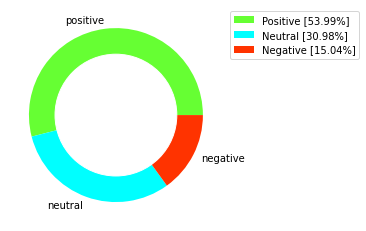

In [15]:
# Pie chart of sentiments for UM.
pie_chart_s(um_df_processed)

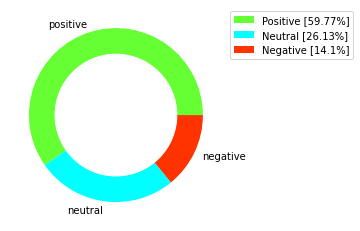

In [16]:
# Pie chart of sentiments for UPM.
pie_chart_s(upm_df_processed)

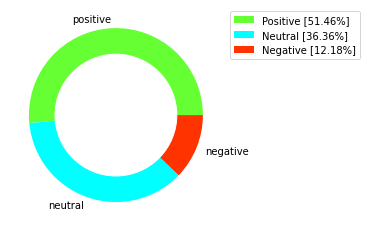

In [17]:
# Pie chart of sentiments for UKM.
pie_chart_s(ukm_df_processed)

# Word Cloud

In [7]:
# Split each dataset by sentiment.
sunway_positive = sunway_df_processed.loc[sunway_df_processed['Sentiment'] == 'positive']
sunway_negative = sunway_df_processed.loc[sunway_df_processed['Sentiment'] == 'negative']
sunway_neutral = sunway_df_processed.loc[sunway_df_processed['Sentiment'] == 'neutral']
taylor_positive = taylor_df_processed.loc[taylor_df_processed['Sentiment'] == 'positive']
taylor_negative = taylor_df_processed.loc[taylor_df_processed['Sentiment'] == 'negative']
taylor_neutral = taylor_df_processed.loc[taylor_df_processed['Sentiment'] == 'neutral']
ucsi_positive = ucsi_df_processed.loc[ucsi_df_processed['Sentiment'] == 'positive']
ucsi_negative = ucsi_df_processed.loc[ucsi_df_processed['Sentiment'] == 'negative']
ucsi_neutral = ucsi_df_processed.loc[ucsi_df_processed['Sentiment'] == 'neutral']
um_positive = um_df_processed.loc[um_df_processed['Sentiment'] == 'positive']
um_negative = um_df_processed.loc[um_df_processed['Sentiment'] == 'negative']
um_neutral = um_df_processed.loc[um_df_processed['Sentiment'] == 'neutral']
upm_positive = upm_df_processed.loc[upm_df_processed['Sentiment'] == 'positive']
upm_negative = upm_df_processed.loc[upm_df_processed['Sentiment'] == 'negative']
upm_neutral = upm_df_processed.loc[upm_df_processed['Sentiment'] == 'neutral']
ukm_positive = ukm_df_processed.loc[ukm_df_processed['Sentiment'] == 'positive']
ukm_negative = ukm_df_processed.loc[ukm_df_processed['Sentiment'] == 'negative']
ukm_neutral = ukm_df_processed.loc[ukm_df_processed['Sentiment'] == 'neutral']

In [18]:
#Function for Wordcloud creation.
def create_wordcloud(text, uni):
    mask = np.array(Image.open('Image/cloud.png'))
    stopwords = set(STOPWORDS)
    stopwords.update(['university', 'universiti', 'student', 'malaysia', 'students', 'sunway', 'taylor', 'will', 's', 'us', 'sunday',
                     'school', 'sunwayuniversity', 'taylorsuniversity', 'ucsiuniversity', 'universitimalaya', 'amp', 'u', 
                      'putra', 'upm', 'ucsi', 'um', 'embolus', 'malaya', 'one', 'lakeside', 'malay', 'put', 'universitytaylor',
                     'pushkin'])
    wc = WordCloud(background_color='white', mask = mask, max_words=3000, 
                   stopwords=stopwords, repeat=False)
    text = ''.join(word for word in text)
    wc.generate(text)
    wc.to_file('Image/wc.png')
    print('Word Cloud of', uni)
    path='Image/wc.png'
    display(Image.open(path))

## Sunway University

Word Cloud of Sunway University (Positive):


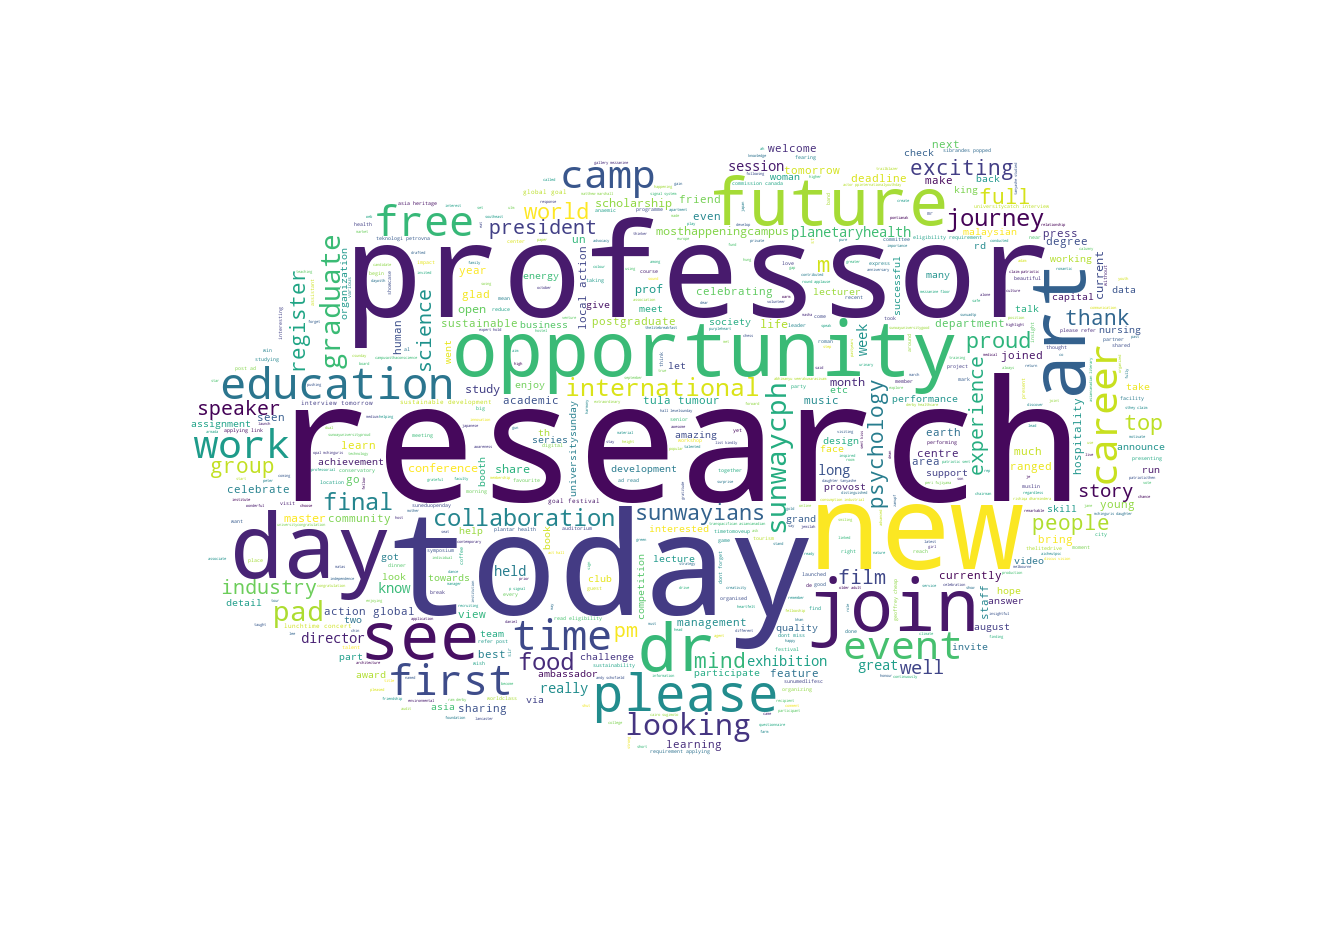

CPU times: total: 7.14 s
Wall time: 8.46 s


In [9]:
%%time
# Creating wordcloud for positive sentiment.
create_wordcloud(sunway_positive.Tokenized_Tweet.values, 'Sunway University (Positive):')

Word Cloud of Sunway University (Negative):


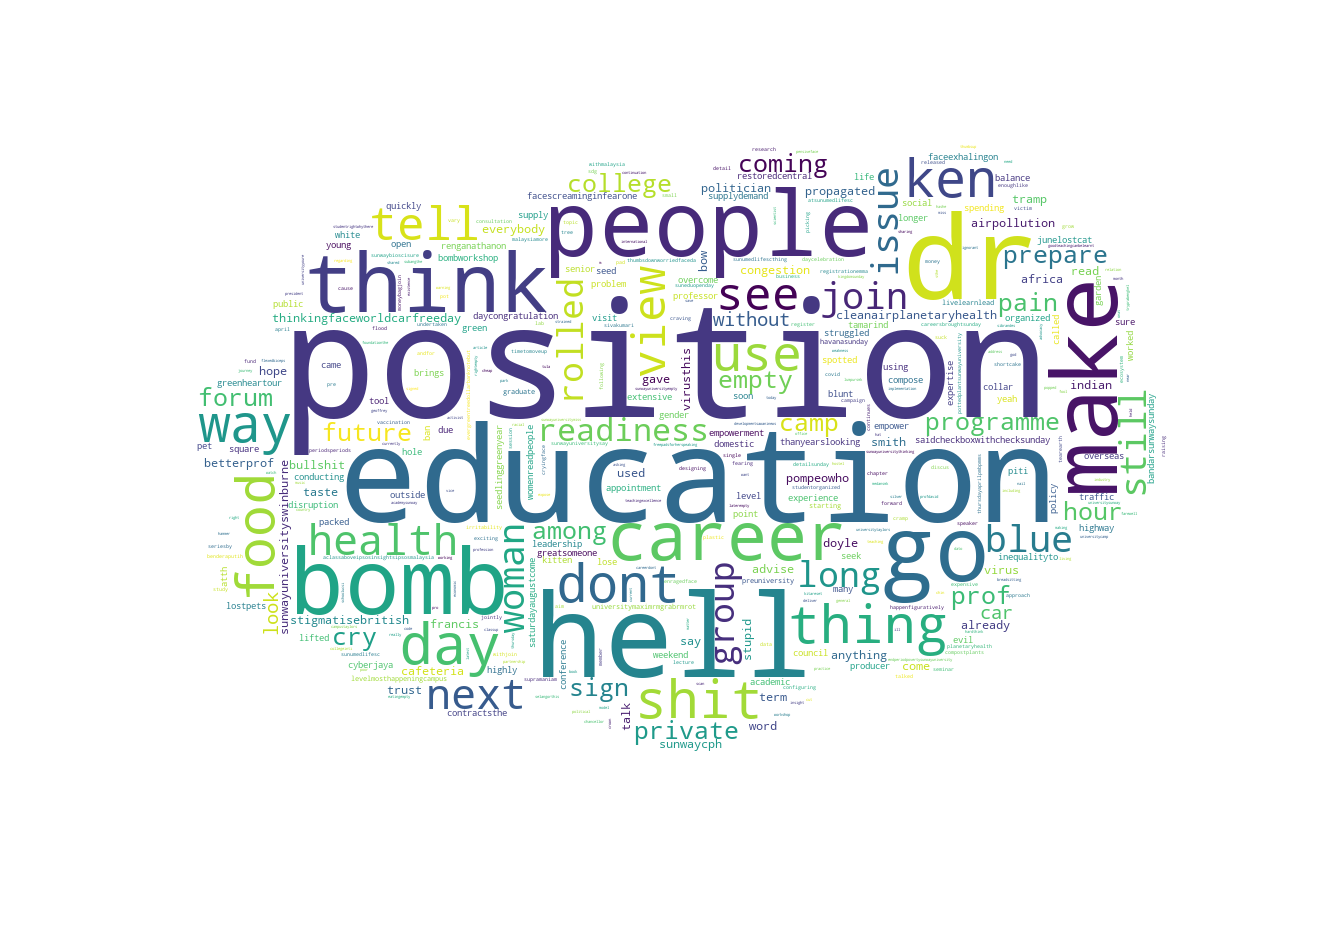

CPU times: total: 5.69 s
Wall time: 6.6 s


In [10]:
%%time
# Creating wordcloud for negative sentiment.
create_wordcloud(sunway_negative.Tokenized_Tweet.values, 'Sunway University (Negative):')

Word Cloud of Sunway University (Neutral):


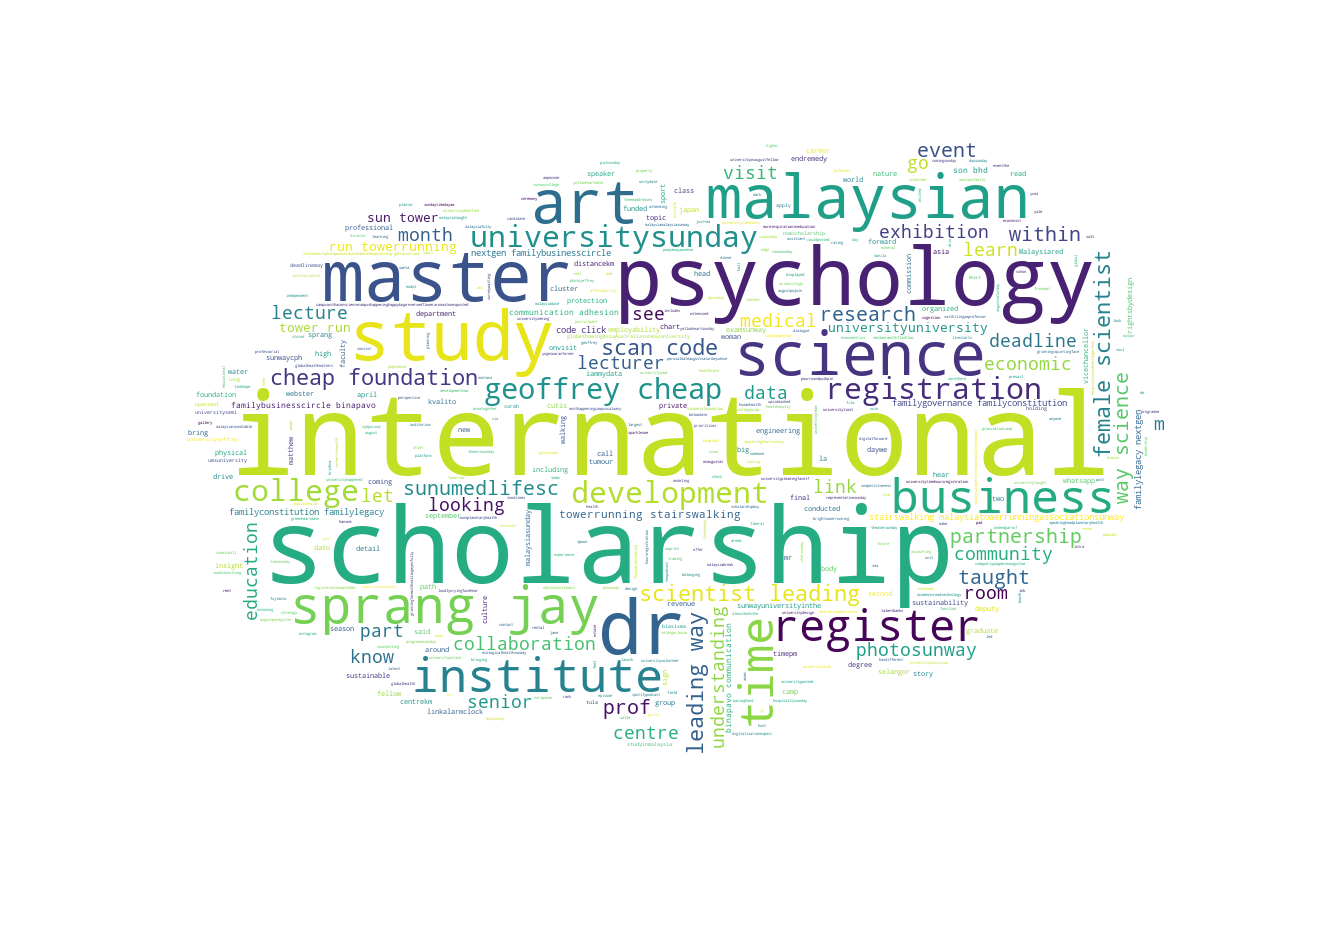

CPU times: total: 5.78 s
Wall time: 7.05 s


In [11]:
%%time
# Creating wordcloud for neutral sentiment.
create_wordcloud(sunway_neutral.Tokenized_Tweet.values, 'Sunway University (Neutral):')

## Taylor's University

Word Cloud of Taylor's University (Positive):


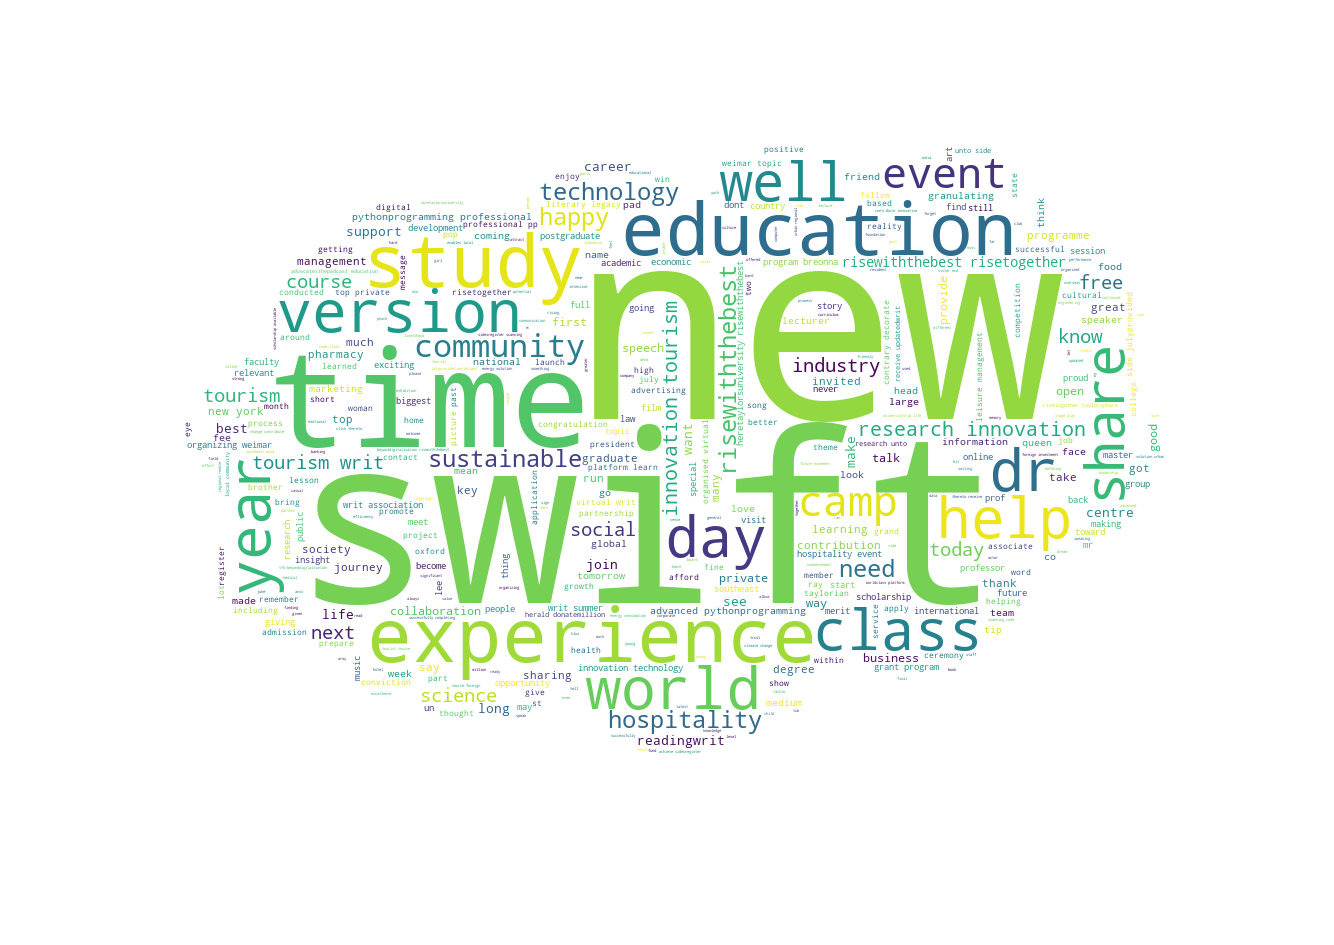

CPU times: total: 6.2 s
Wall time: 7.55 s


In [12]:
%%time
# Creating wordcloud for positive sentiment.
create_wordcloud(taylor_positive.Tokenized_Tweet.values, 'Taylor\'s University (Positive):')

Word Cloud of Taylor's University (Negative):


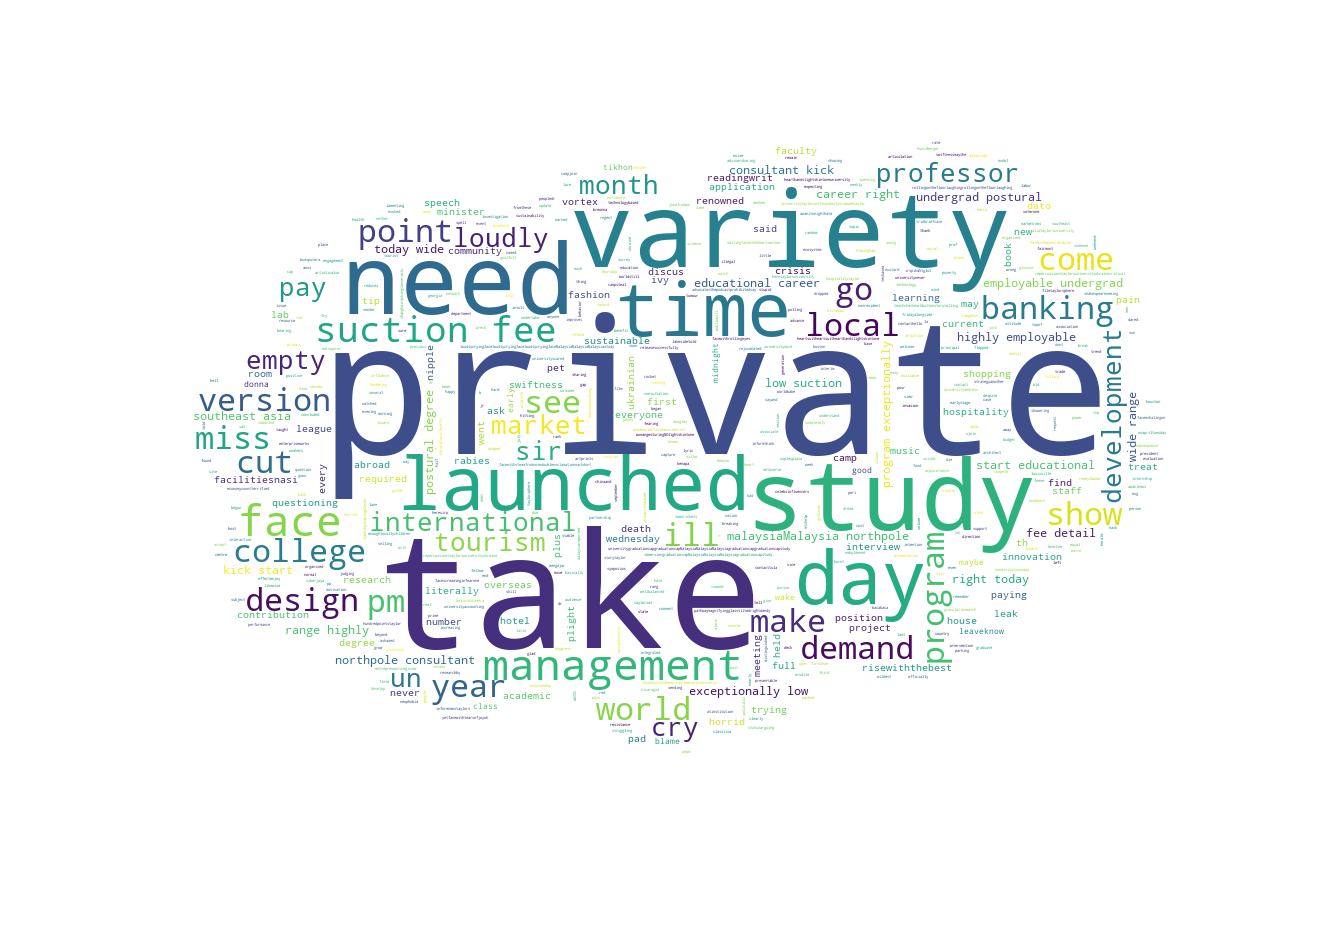

CPU times: total: 7.3 s
Wall time: 9.02 s


In [13]:
%%time
# Creating wordcloud for negative sentiment.
create_wordcloud(taylor_negative.Tokenized_Tweet.values, 'Taylor\'s University (Negative):')

Word Cloud of Taylor's University (Neutral):


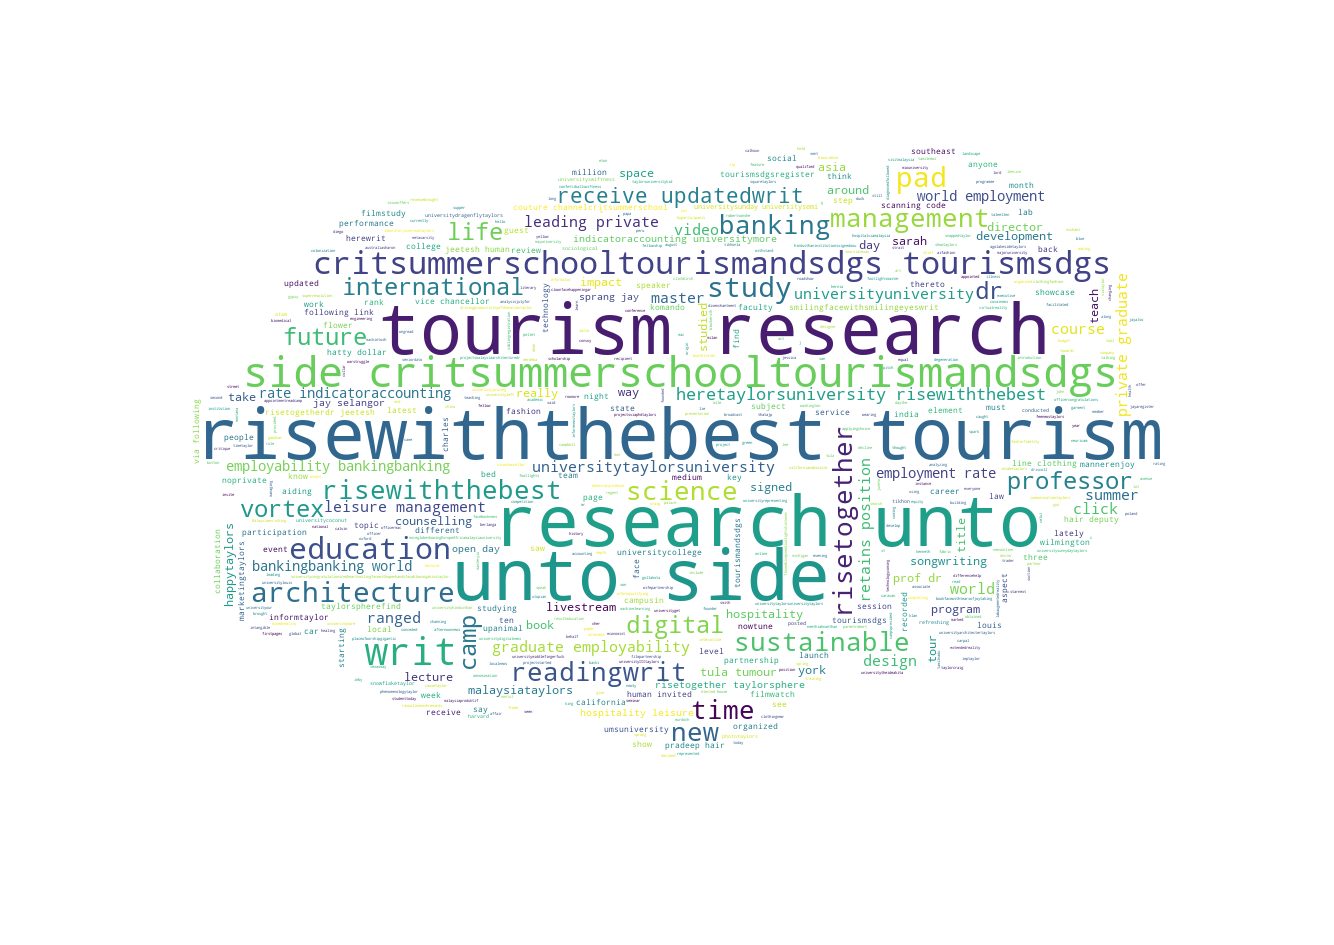

CPU times: total: 6.91 s
Wall time: 8.56 s


In [14]:
%%time
# Creating wordcloud for neutral sentiment.
create_wordcloud(taylor_neutral.Tokenized_Tweet.values, 'Taylor\'s University (Neutral):')

## UCSI University

Word Cloud of UCSI University (Positive):


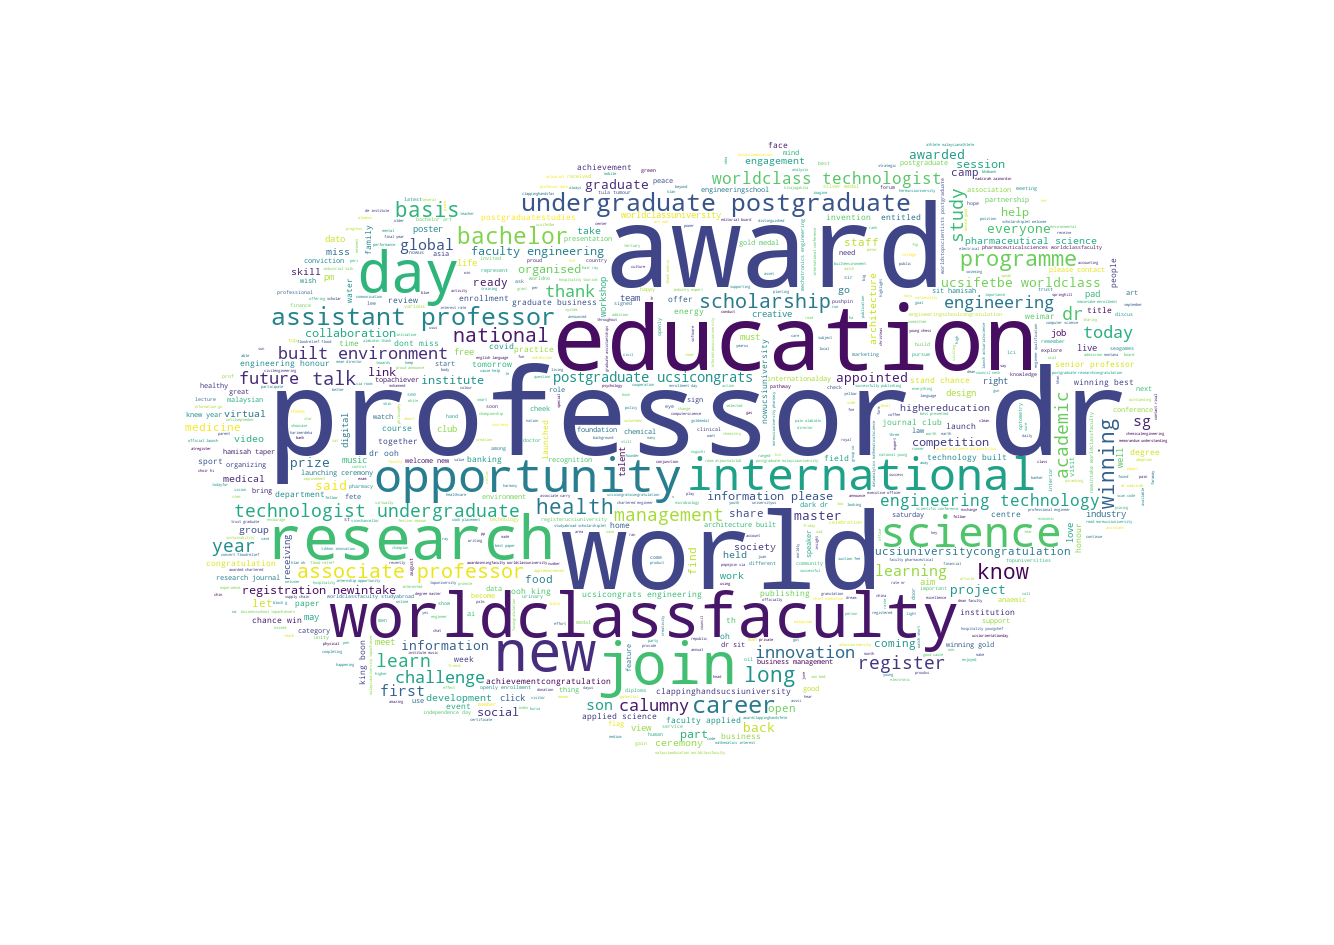

CPU times: total: 9.11 s
Wall time: 10.7 s


In [20]:
%%time
# Creating wordcloud for positive sentiment.
create_wordcloud(ucsi_positive.Tokenized_Tweet.values, 'UCSI University (Positive):')

Word Cloud of UCSI University (Negative):


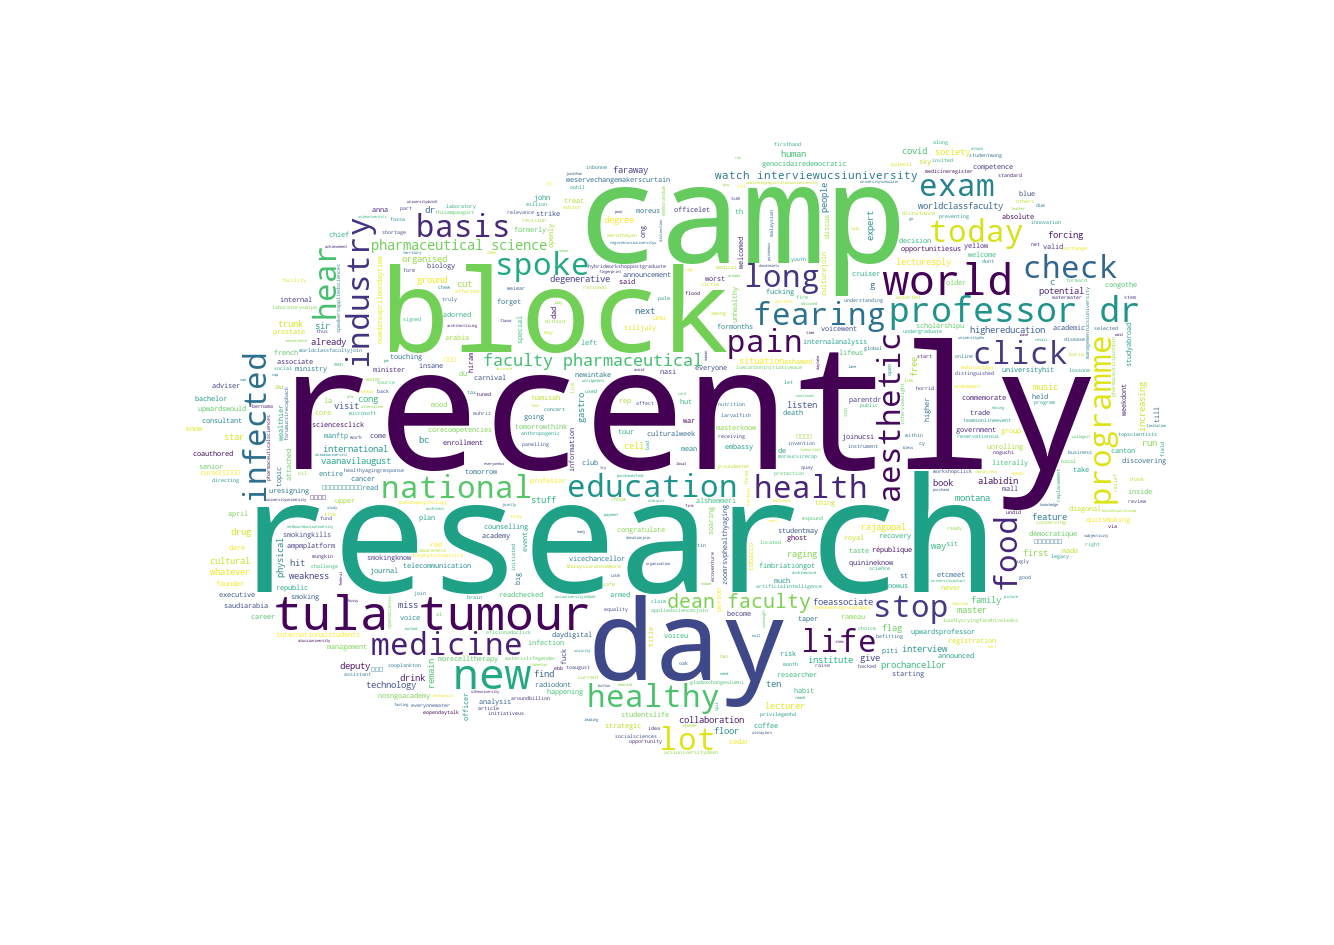

CPU times: total: 7.08 s
Wall time: 8.91 s


In [21]:
%%time
# Creating wordcloud for negative sentiment.
create_wordcloud(ucsi_negative.Tokenized_Tweet.values, 'UCSI University (Negative):')

Word Cloud of UCSI University (Neutral):


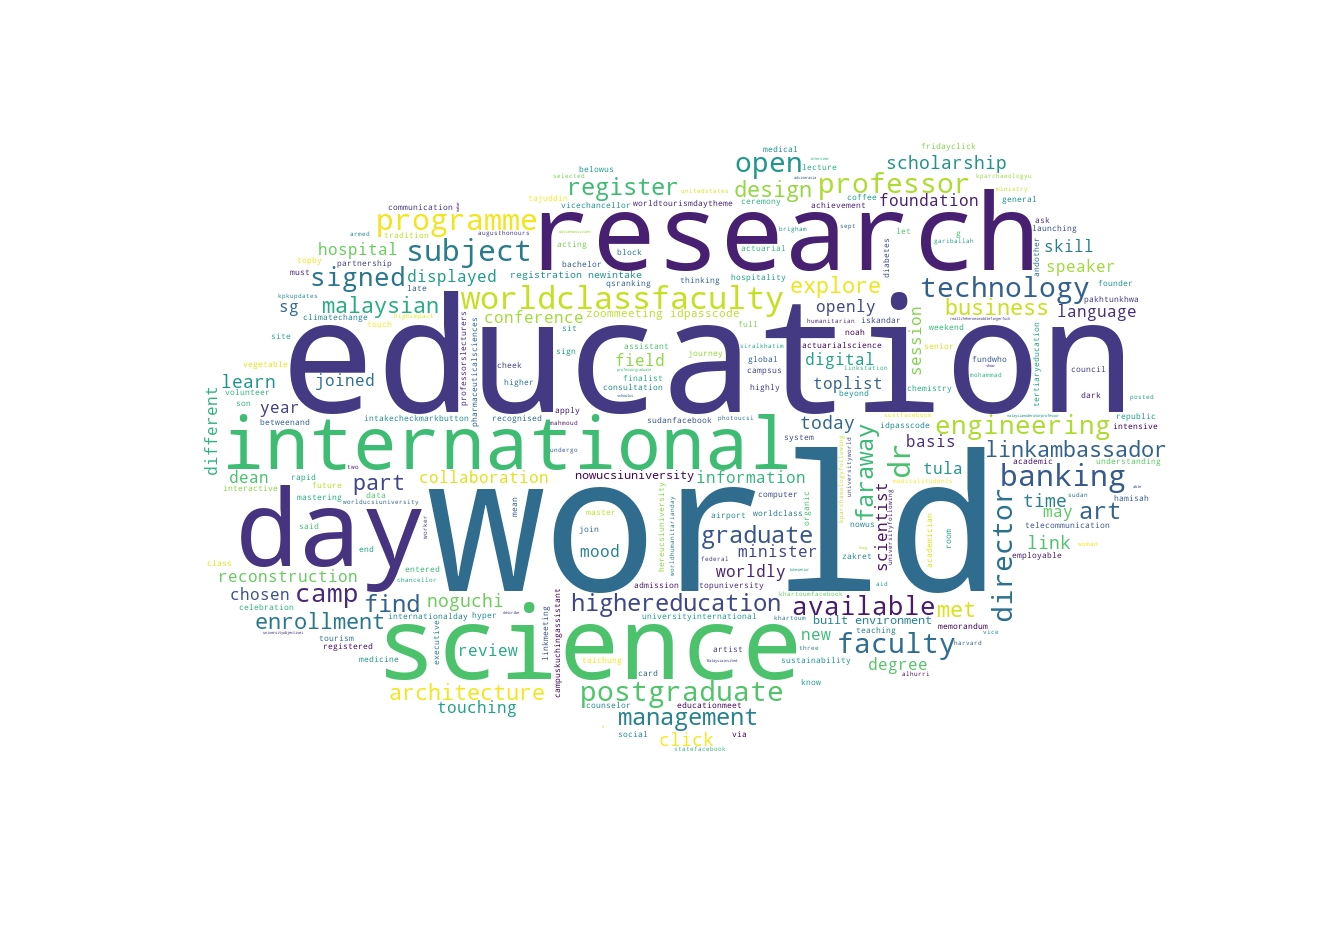

CPU times: total: 4.08 s
Wall time: 5.14 s


In [22]:
%%time
# Creating wordcloud for neutral sentiment.
create_wordcloud(ucsi_neutral.Tokenized_Tweet.values, 'UCSI University (Neutral):')

## UM

Word Cloud of UM (Positive):


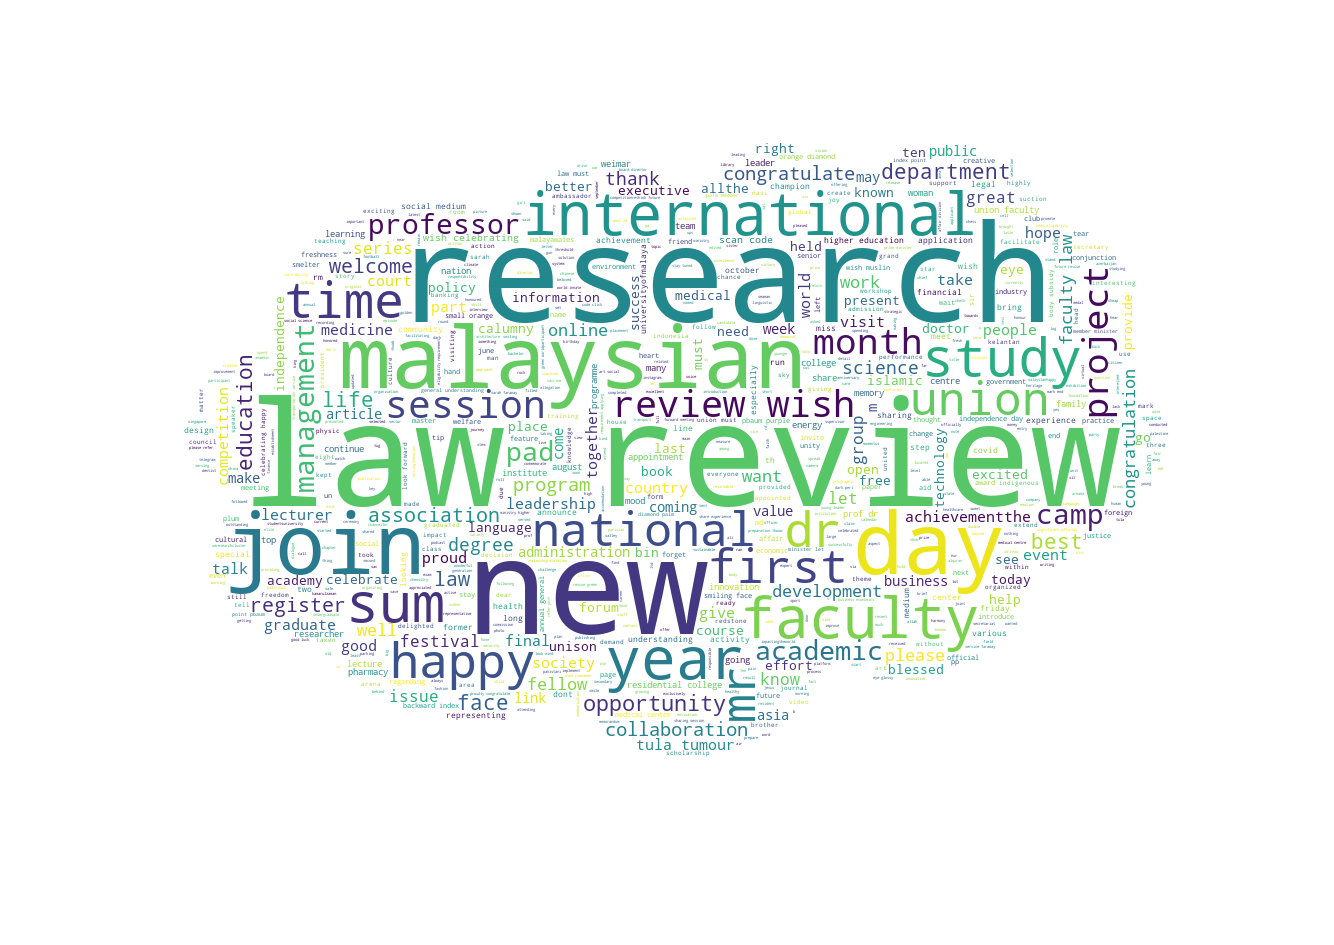

CPU times: total: 9.55 s
Wall time: 10.8 s


In [23]:
%%time
# Creating wordcloud for positive sentiment.
create_wordcloud(um_positive.Tokenized_Tweet.values, 'UM (Positive):')

Word Cloud of UM (Negative):


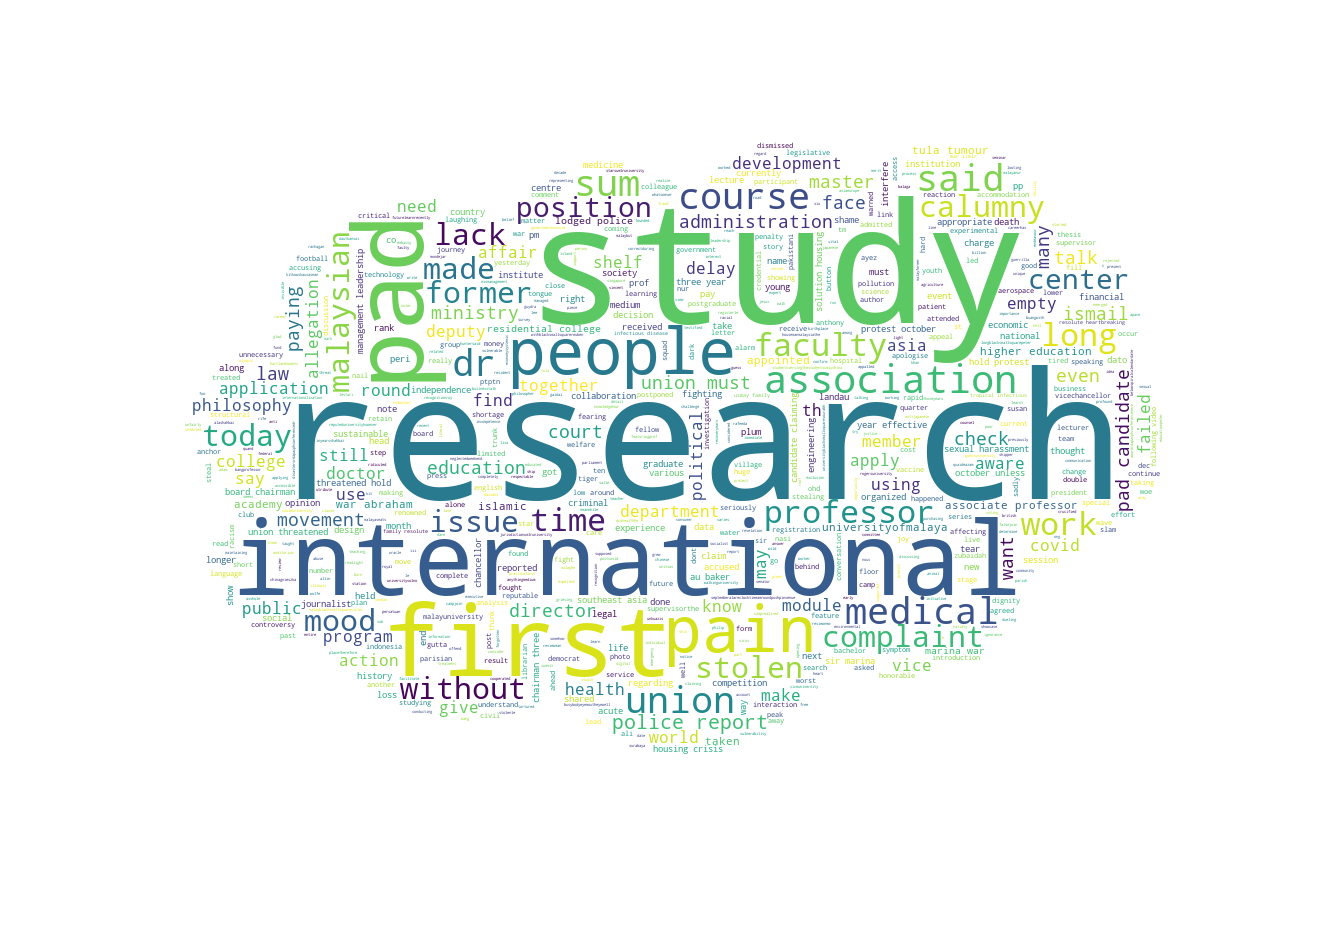

CPU times: total: 7.61 s
Wall time: 10.6 s


In [24]:
%%time
# Creating wordcloud for negative sentiment.
create_wordcloud(um_negative.Tokenized_Tweet.values, 'UM (Negative):')

Word Cloud of UM (Neutral):


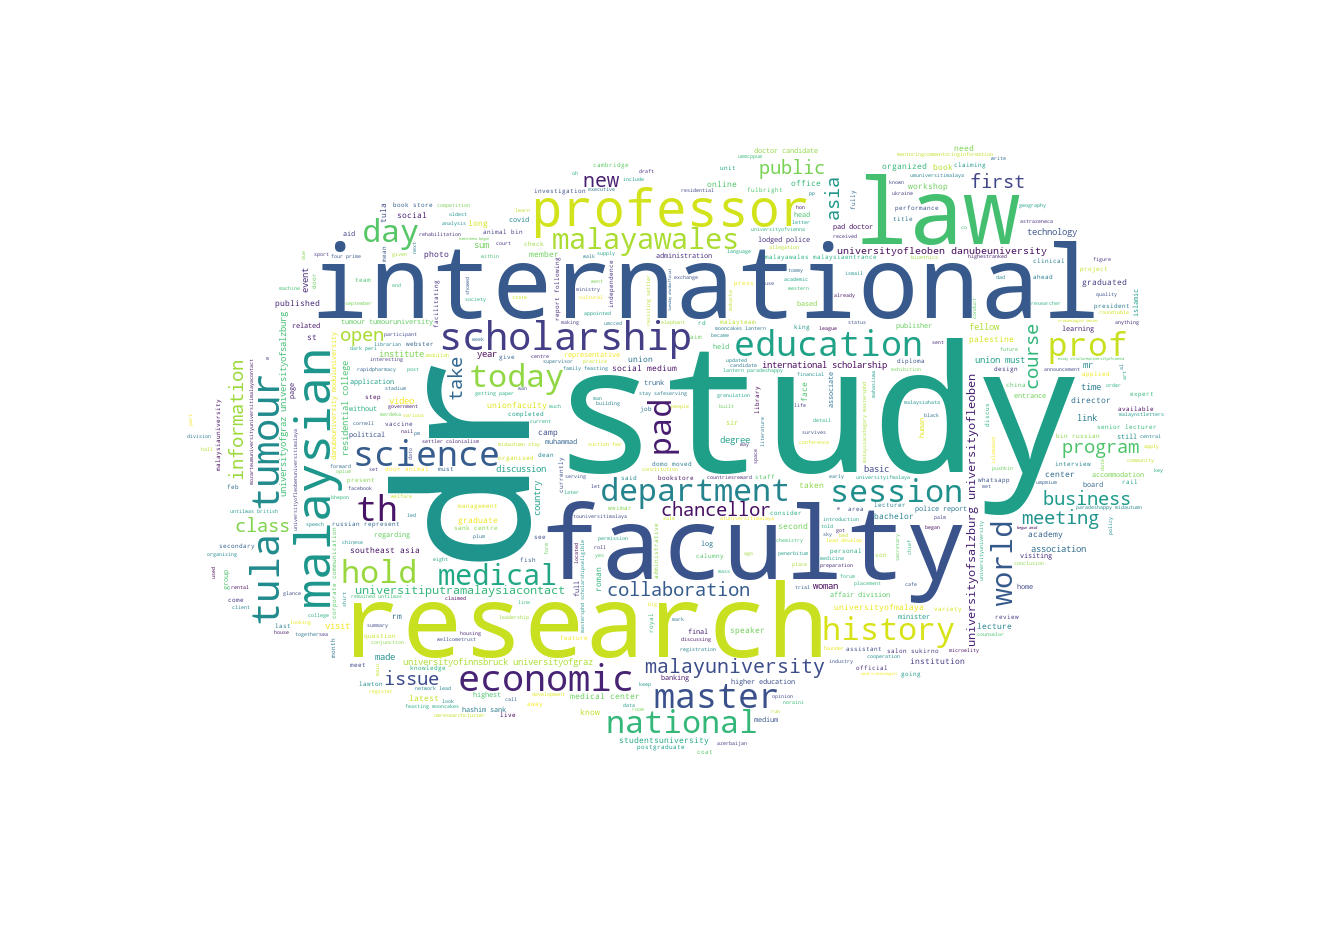

CPU times: total: 6.41 s
Wall time: 7.91 s


In [25]:
%%time
# Creating wordcloud for neutral sentiment.
create_wordcloud(um_neutral.Tokenized_Tweet.values, 'UM (Neutral):')

## UPM

Word Cloud of UPM (Positive):


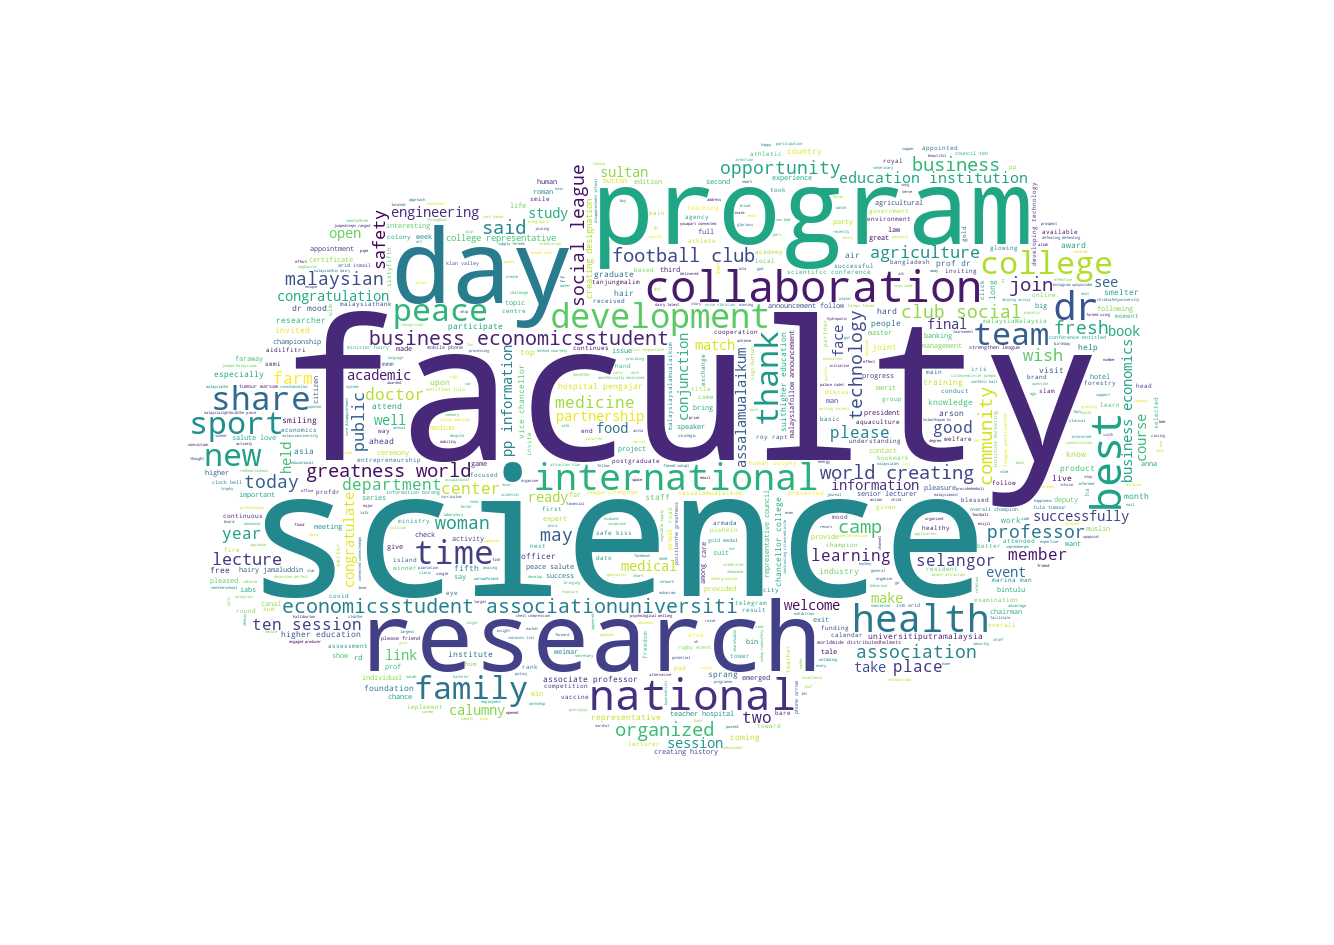

CPU times: total: 8.16 s
Wall time: 10.1 s


In [26]:
%%time
# Creating wordcloud for positive sentiment.
create_wordcloud(upm_positive.Tokenized_Tweet.values, 'UPM (Positive):')

Word Cloud of UPM (Negative):


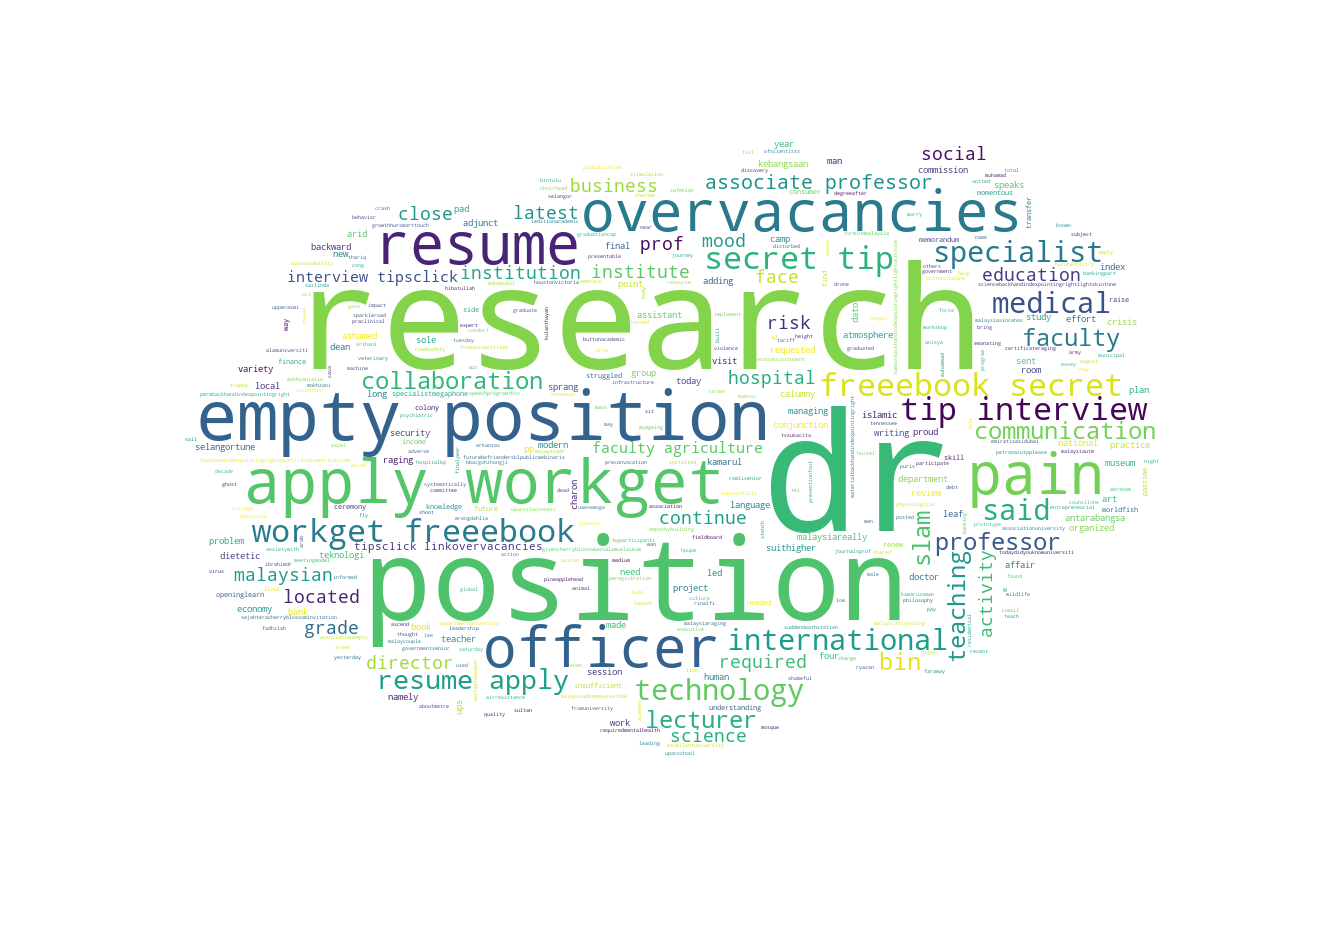

CPU times: total: 5.61 s
Wall time: 6.65 s


In [19]:
%%time
# Creating wordcloud for negative sentiment..
create_wordcloud(upm_negative.Tokenized_Tweet.values, 'UPM (Negative):')

Word Cloud of UPM (Neutral):


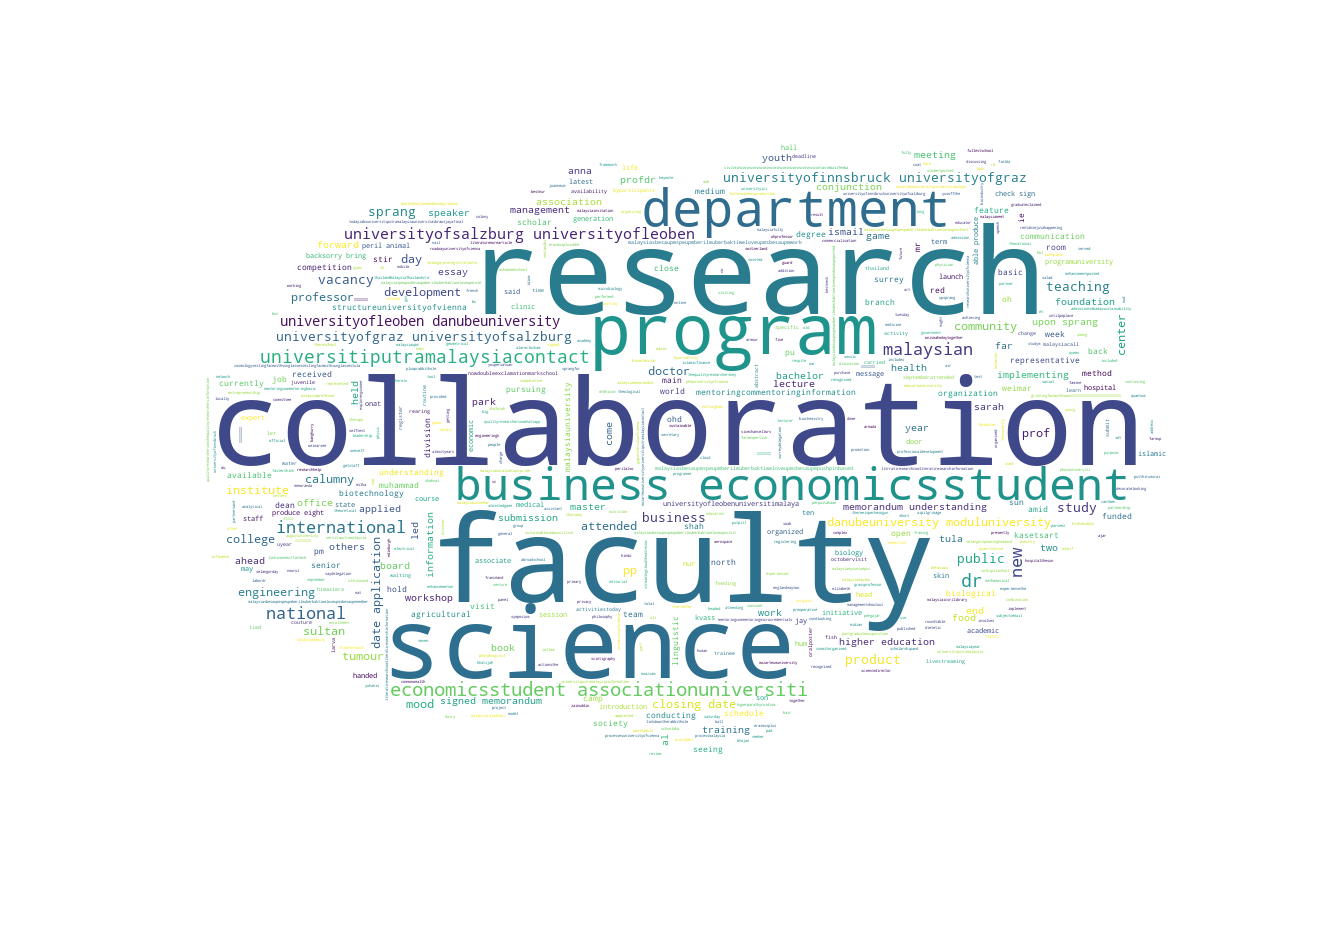

CPU times: total: 7.08 s
Wall time: 8.37 s


In [28]:
%%time
# Creating wordcloud for neutral sentiment..
create_wordcloud(upm_neutral.Tokenized_Tweet.values, 'UPM (Neutral):')

## UKM

Word Cloud of UKM (Positive):


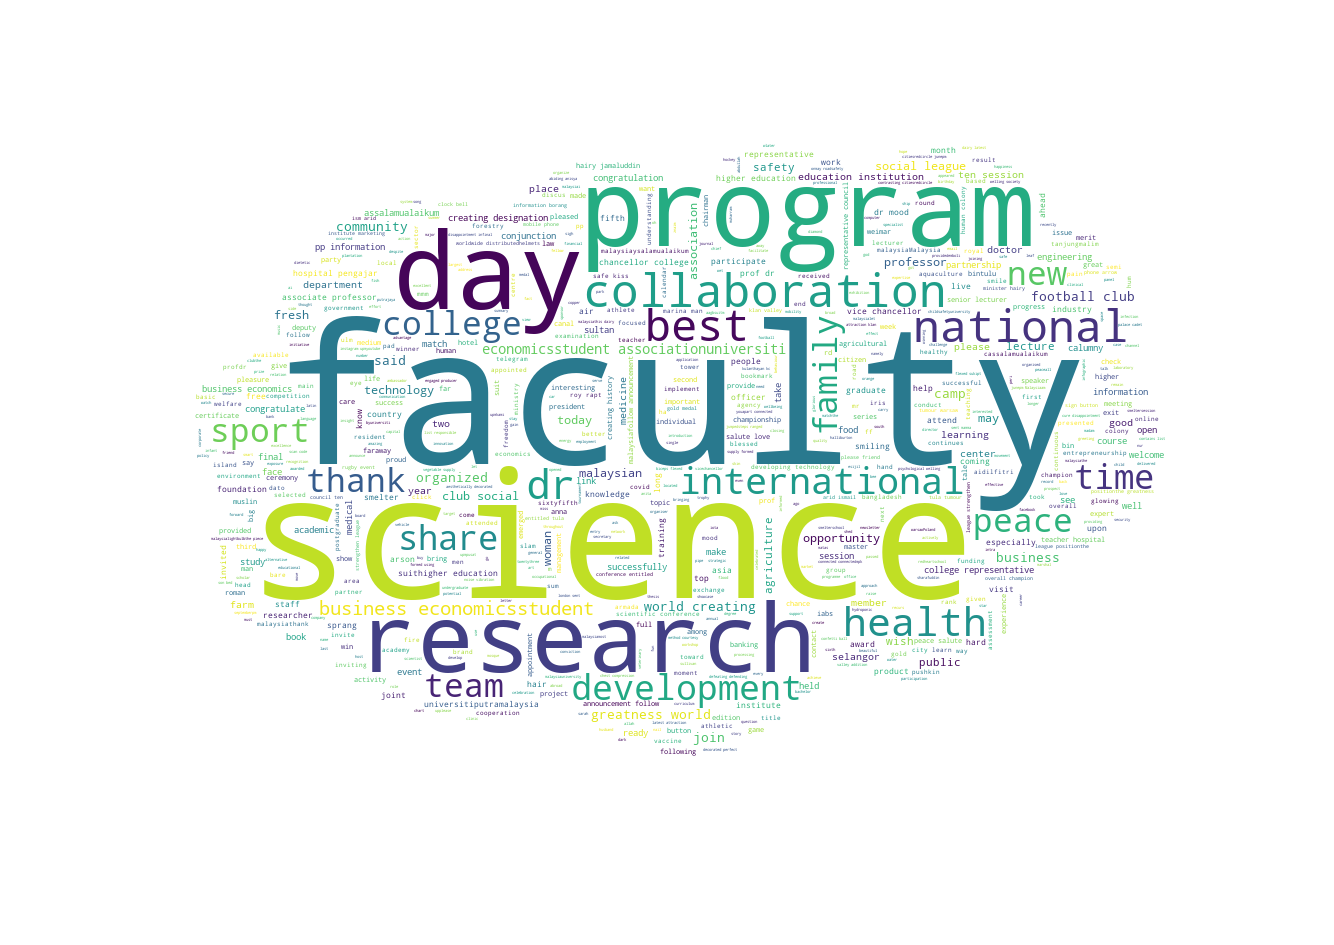

CPU times: total: 8.56 s
Wall time: 10.1 s


In [29]:
%%time
# Creating wordcloud for positive sentiment.
create_wordcloud(upm_positive.Tokenized_Tweet.values, 'UKM (Positive):')

Word Cloud of UKM (Negative):


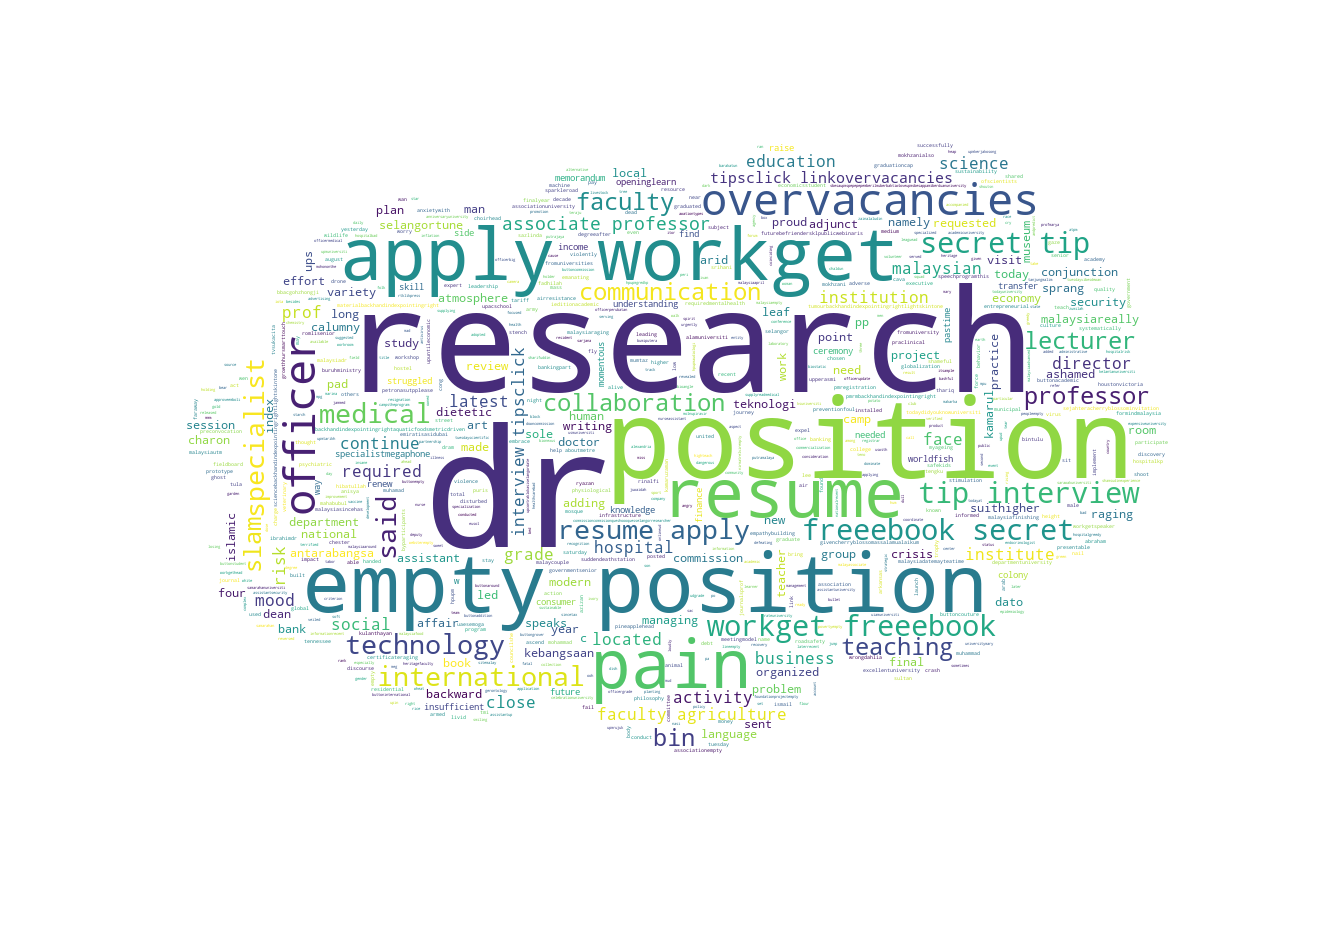

CPU times: total: 8.73 s
Wall time: 10 s


In [20]:
%%time
# Creating wordcloud for negative sentiment.
create_wordcloud(upm_negative.Tokenized_Tweet.values, 'UKM (Negative):')

Word Cloud of UKM (Neutral):


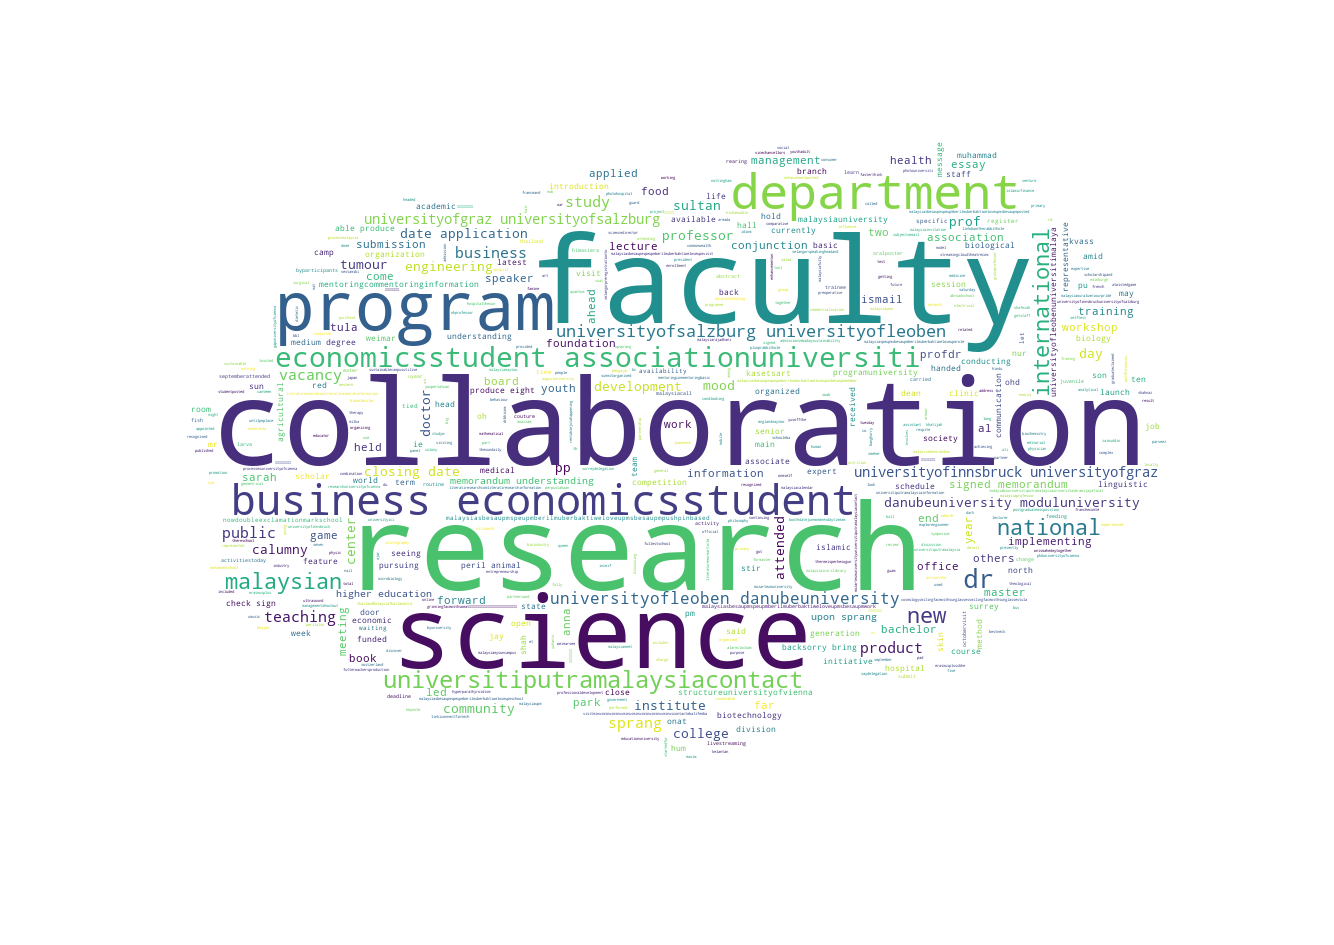

CPU times: total: 6.84 s
Wall time: 8.02 s


In [21]:
%%time
# Creating wordcloud for neutral sentiment.
create_wordcloud(upm_neutral.Tokenized_Tweet.values, 'UKM (Neutral):')

# Column 'Source_of_Tweet'

In [52]:
# Count and percentage of Source_of_Tweet for Sunway University.
count_values_in_column(sunway_df_processed,'Source_of_Tweet')

Count  Percentage
Twitter Web App              189       40.21
Twitter for iPhone           101       21.49
Twitter for Android           75       15.96
WordPress.com                 22        4.68
Instagram                     16        3.40
IFTTT                         10        2.13
Hootsuite Inc.                 9        1.91
dlvr.it                        6        1.28
Buffer                         6        1.28
TweetDeck                      6        1.28
Foursquare Swarm               5        1.06
Twitter Media Studio           4        0.85
RADAAR                         3        0.64
ProdTheEdgeMarketsFeedAPI      3        0.64
LinkedIn                       2        0.43
Revive Social App              2        0.43
NadarSenpai                    1        0.21
Devdiscourse News Desk         1        0.21
CoSchedule                     1        0.21
Loomly                         1        0.21
Typefully                      1        0.21
Fenix 2                        1        0.21
Twitter for iPad               1        0.21
Cheap Bots, Done Quick!        1        0.21
covaichronicleApp              1        0.21
TwitterRSSTSOLAgent            1        0.21
Foursquare                     1        0.21

In [53]:
# Count and percentage of Source_of_Tweet for Taylor's University.
count_values_in_column(taylor_df_processed,'Source_of_Tweet')

Count  Percentage
Twitter Web App              297       46.55
Twitter for iPhone           130       20.38
Twitter for Android           92       14.42
Instagram                     43        6.74
WordPress.com                  9        1.41
IFTTT                          8        1.25
Hootsuite Inc.                 7        1.10
LinkedIn                       6        0.94
Twitter for iPad               5        0.78
TweetDeck                      4        0.63
Foursquare                     4        0.63
Cheap Bots, Done Quick!        4        0.63
Twitter Media Studio           3        0.47
Sprout Social                  3        0.47
dlvr.it                        2        0.31
CoSchedule                     2        0.31
Buffer                         2        0.31
SocialFlow                     2        0.31
SocialNewsDesk                 2        0.31
Agorapulse app                 2        0.31
RADAAR                         2        0.31
EIN Presswire                  1        0.16
Semrush Social Media Tool      1        0.16
Powered by Sprinklr            1        0.16
rose_brand_bot                 1        0.16
HubSpot                        1        0.16
Digital Music PLOW             1        0.16
Twitter for Mac                1        0.16
ContentStudio.io               1        0.16
Foursquare Swarm               1        0.16

In [25]:
# Count and percentage of Source_of_Tweet for UCSI University.
count_values_in_column(ucsi_df_processed,'Source_of_Tweet')

Count  Percentage
Twitter Web App            596       87.13
Twitter for iPhone          29        4.24
Twitter for Android         22        3.22
Instagram                    6        0.88
TweetDeck                    5        0.73
WordPress.com                4        0.58
Foursquare                   4        0.58
LinkedIn                     2        0.29
dlvr.it                      2        0.29
Hootsuite Inc.               2        0.29
IFTTT                        2        0.29
Brandwatch                   1        0.15
Buffer                       1        0.15
Twitter Media Studio         1        0.15
scholarshipsads.com          1        0.15
Sprout Social                1        0.15
Khoros Publishing App        1        0.15
Cheap Bots, Done Quick!      1        0.15
TwitterRSSTSOLAgent          1        0.15
Oktopost                     1        0.15
twittbot.net                 1        0.15

In [26]:
# Count and percentage of Source_of_Tweet for UM.
count_values_in_column(um_df_processed,'Source_of_Tweet')

Count  Percentage
Twitter Web App               446       36.65
Twitter for iPhone            315       25.88
Twitter for Android           249       20.46
Instagram                      37        3.04
Twitter for iPad               23        1.89
IFTTT                          15        1.23
malforscheduler                14        1.15
WordPress.com                  12        0.99
TweetDeck                      11        0.90
LinkedIn                        9        0.74
Buffer                          8        0.66
dlvr.it                         8        0.66
Foursquare                      7        0.58
Foursquare Swarm                6        0.49
Hootsuite Inc.                  6        0.49
Sprout Social                   4        0.33
Cheap Bots, Done Quick!         4        0.33
Twitterrific for iOS            3        0.25
Revive Social App               3        0.25
Reddit Official                 3        0.25
Tumblr                          3        0.25
BeritaKini.biz                  2        0.16
Twitter Media Studio            2        0.16
ohmedia website                 2        0.16
Publer.io                       2        0.16
Loomly                          2        0.16
Sprinklr Publishing             2        0.16
THE VOCKET                      2        0.16
scholarshipsads.com             2        0.16
ContentStudio.io                1        0.08
TW Blue                         1        0.08
fauzanalrasyid                  1        0.08
OneUp App                       1        0.08
Spyloadedapp                    1        0.08
Zoho Social                     1        0.08
ProdTheEdgeMarketsFeedAPI       1        0.08
Canva                           1        0.08
Twitter for Mac                 1        0.08
Microsoft Power Platform        1        0.08
TweetDeck Web App               1        0.08
FS_Poster_App                   1        0.08
Make (formerly Integromat)      1        0.08
Twitter for Advertisers         1        0.08
Hypefury                        1        0.08

In [27]:
# Count and percentage of Source_of_Tweet for UPM.
count_values_in_column(upm_df_processed,'Source_of_Tweet')

Count  Percentage
Twitter Web App         153       28.76
Twitter for iPhone      151       28.38
Twitter for Android     130       24.44
Instagram                26        4.89
Hootsuite Inc.           12        2.26
TweetDeck                10        1.88
IFTTT                     6        1.13
WordPress.com             5        0.94
LinkedIn                  4        0.75
Foursquare                4        0.75
Sprout Social             3        0.56
Tumblr                    3        0.56
BeritaKini.biz            3        0.56
Foursquare Swarm          2        0.38
Twitter Media Studio      2        0.38
Twitter for iPad          2        0.38
Loomly                    2        0.38
ContentStudio.io          2        0.38
dlvr.it                   2        0.38
Twitter for Mac           1        0.19
twittbot.net              1        0.19
NovaPress                 1        0.19
HubSpot                   1        0.19
Tweepsmap                 1        0.19
SOCi                      1        0.19
smapiroitb                1        0.19
Buffer                    1        0.19
DD SMAP                   1        0.19
Blog2Social APP           1        0.19

In [28]:
# Count and percentage of Source_of_Tweet for UKM.
count_values_in_column(ukm_df_processed,'Source_of_Tweet')

Count  Percentage
Twitter Web App            183       29.71
Twitter for Android        172       27.92
Twitter for iPhone         156       25.32
Hootsuite Inc.              17        2.76
WordPress.com               12        1.95
IFTTT                       11        1.79
TweetDeck                   11        1.79
Instagram                   10        1.62
dlvr.it                      6        0.97
Twitter for iPad             6        0.97
LinkedIn                     4        0.65
Sprout Social                3        0.49
Foursquare                   3        0.49
Foursquare Swarm             3        0.49
Twitter Media Studio         2        0.32
twittbot.net                 1        0.16
Echobox                      1        0.16
tauberita                    1        0.16
Tweepsmap                    1        0.16
Cheap Bots, Done Quick!      1        0.16
berita_tular                 1        0.16
OneUp App                    1        0.16
Buffer                       1        0.16
CarpoolWorld Feed            1        0.16
Mottos                       1        0.16
Blog2Social APP              1        0.16
Dynamic Signal               1        0.16
isearch247                   1        0.16
Five O'Clock Somewhere       1        0.16
GT_Backend                   1        0.16
Tweetlogix                   1        0.16
Socio Enterprise             1        0.16

In [29]:
piechart = count_values_in_column(sunway_df_processed,'Source_of_Tweet')
names = piechart.index
piechart.loc[piechart.index[0], 'Percentage']

40.21

In [30]:
# Function to create piechart for Source_of_Tweet.
def pie_chart_sot(df):
    # create data for Pie Chart.
    piechart = count_values_in_column(df,'Source_of_Tweet')
    names = piechart.index
    size = piechart['Percentage']
    percentage = piechart['Percentage'].tolist()[0:4]
    
    labels = []
    for i in names:
        sot = i
        percentage = piechart.loc[i, 'Percentage']
        text = f'{i} [' + str(percentage) + '%]'
        labels.append(text)
    
    # Create a circle for the center of the plot.
    my_circle=plt.Circle((0,0), 0.7, color='white')
    plt.pie(size)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.legend(labels,bbox_to_anchor=(1, 1))
    plt.show()

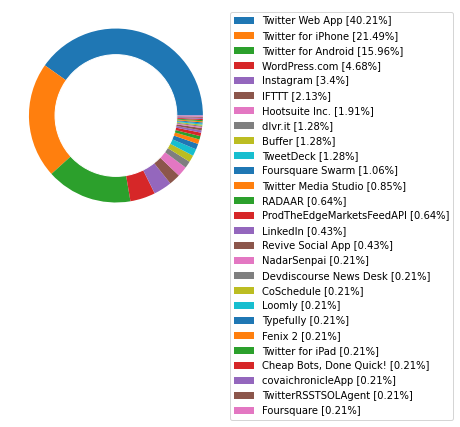

In [31]:
pie_chart_sot(sunway_df_processed)

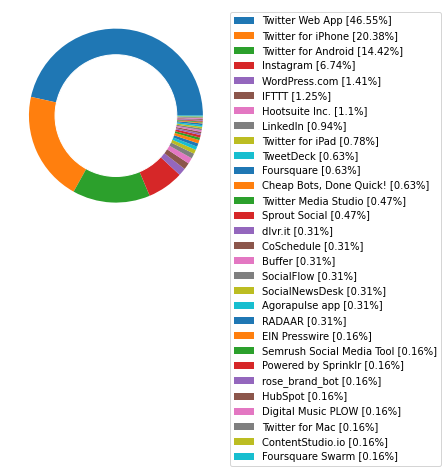

In [32]:
pie_chart_sot(taylor_df_processed)

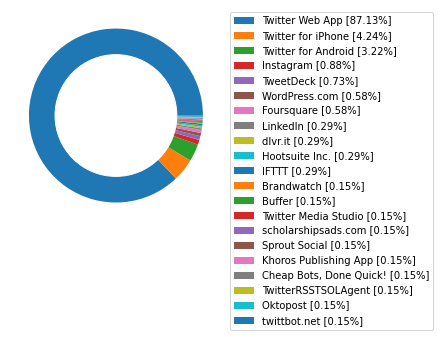

In [33]:
pie_chart_sot(ucsi_df_processed)

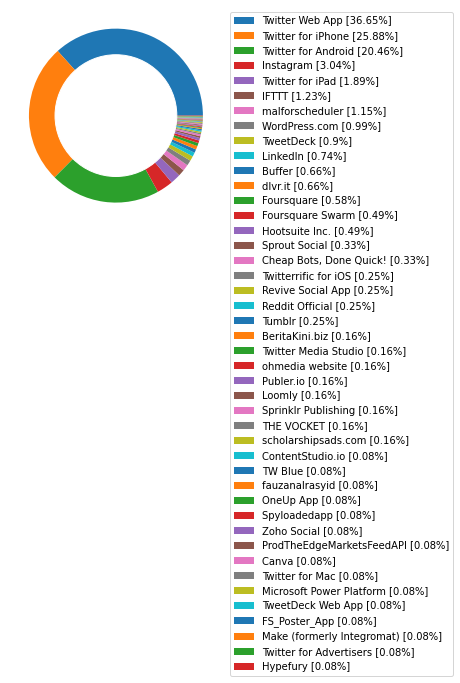

In [34]:
pie_chart_sot(um_df_processed)

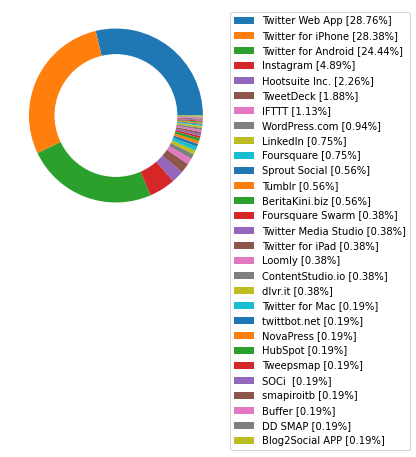

In [35]:
pie_chart_sot(upm_df_processed)

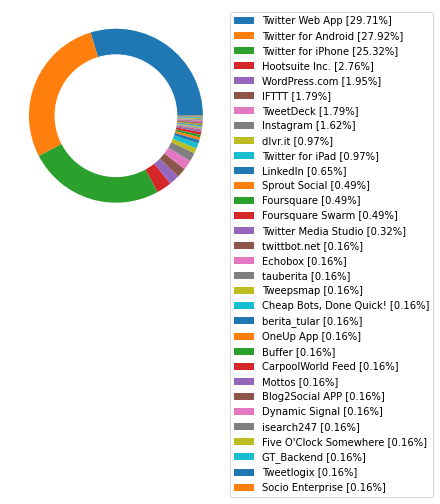

In [36]:
pie_chart_sot(ukm_df_processed)

# Column 'Number_of_Likes'

In [6]:
# Function for mean of number of likes filtered by sentiment.
def mean_number_of_likes_by_sentiment(df):
    df = df.loc[:,['Number_of_Likes', 'Sentiment']]
    meandf = df.groupby(['Sentiment']).mean()
    meandf = meandf.Number_of_Likes.apply(lambda x : round(x,2))
    meandf = pd.DataFrame(meandf)
    meandf.rename(columns={'Number_of_Likes':'Mean_of_Number_of_Likes'}, inplace = True)
    
    return meandf

In [7]:
# Function to plot bar chart for mean of number of likes filtered by sentiment
def bar_mean_like(df, uniname):
    meandf = mean_number_of_likes_by_sentiment(df)
    sentiment = meandf.index
    mean = meandf['Mean_of_Number_of_Likes']
    
    # Figure Size
    fig, ax = plt.subplots(figsize =(10, 5))
    ax.barh(sentiment, mean, color = '#ff9933')
    
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.05, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 12, fontweight ='bold',
                 color ='grey')
    
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 5)
    
    # Show top values
    ax.invert_yaxis()

    # Add Plot Title
    ax.set_title(f'Mean of Number of Likes of Tweets for {uniname}',
             loc ='left', fontsize = 20, fontweight ='bold')
    
    # Adding Xticks
    plt.xlabel('Mean Number of Likes', fontweight ='bold', fontsize = 15)
    plt.ylabel('Sentiments', fontweight ='bold', fontsize = 15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    # Add x, y gridlines
    ax.grid(visible = True, color ='black',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    
    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
    
    # Show Plot
    plt.show()

In [39]:
mean_number_of_likes_by_sentiment(sunway_df_processed)

Mean_of_Number_of_Likes
Sentiment                         
negative                      2.88
neutral                       2.42
positive                      9.14

In [40]:
mean_number_of_likes_by_sentiment(taylor_df_processed)

Mean_of_Number_of_Likes
Sentiment                         
negative                      2.09
neutral                      11.83
positive                     27.63

In [41]:
mean_number_of_likes_by_sentiment(ucsi_df_processed)

Mean_of_Number_of_Likes
Sentiment                         
negative                      0.86
neutral                       1.15
positive                      0.96

In [42]:
mean_number_of_likes_by_sentiment(um_df_processed)

Mean_of_Number_of_Likes
Sentiment                         
negative                     19.60
neutral                       5.85
positive                      6.16

In [43]:
mean_number_of_likes_by_sentiment(upm_df_processed)

Mean_of_Number_of_Likes
Sentiment                         
negative                      4.76
neutral                       3.91
positive                      5.90

In [8]:
mean_number_of_likes_by_sentiment(ukm_df_processed)

Mean_of_Number_of_Likes
Sentiment                         
negative                     29.27
neutral                      21.15
positive                     15.98

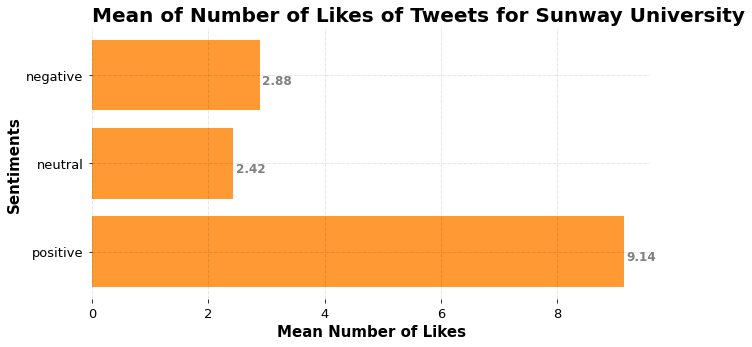

In [9]:
bar_mean_like(sunway_df_processed, 'Sunway University')

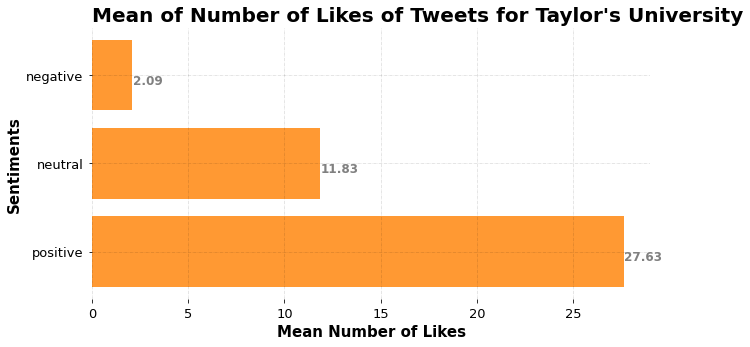

In [10]:
bar_mean_like(taylor_df_processed, 'Taylor\'s University')

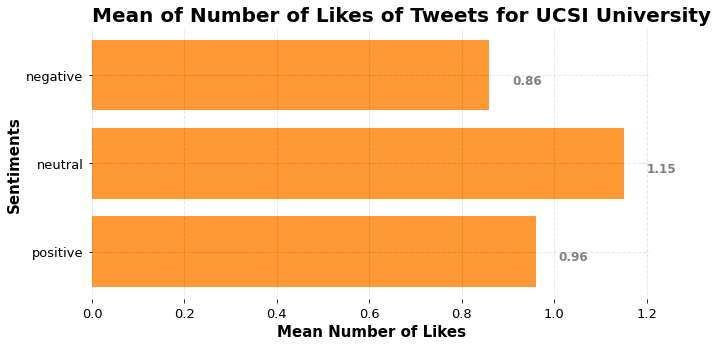

In [11]:
bar_mean_like(ucsi_df_processed, 'UCSI University')

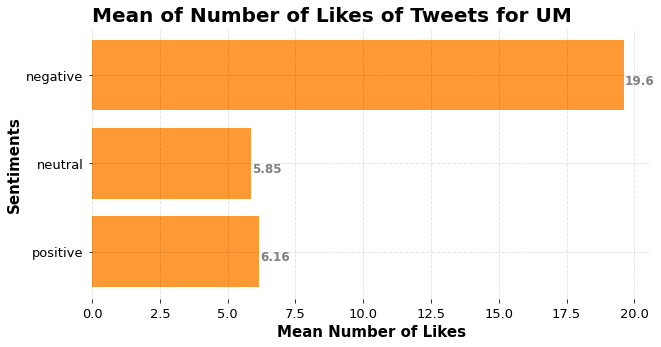

In [12]:
bar_mean_like(um_df_processed, 'UM')

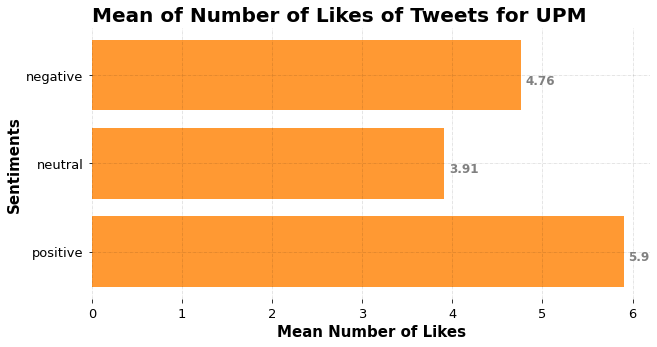

In [13]:
bar_mean_like(upm_df_processed, 'UPM')

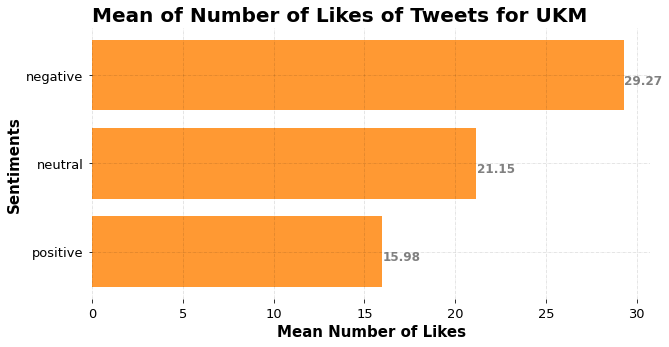

In [14]:
bar_mean_like(ukm_df_processed, 'UKM')